In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_neh_numbers_utmb.csv")
data.shape

(768, 20)

In [3]:
data.columns

Index(['Protein', 'Peptide', 'Charge', 'T_NEH', 'Asym_NEH', 'MPE_NEH',
       'APE_NEH', 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE', 'sd_neh', 'sd_rmse',
       'il_neh', 'il_rmse', 'i0_0', 'i1_0', 'i2_0', 'i0_31', 'i1_31', 'i2_31'],
      dtype='object')

In [4]:
data=data.dropna()
data.shape

(768, 20)

In [5]:
(data[data.Asym_RMSE < 0.01].shape[0],
data[data.APE_RMSE < 0.01].shape[0],
data[data.MPE_RMSE < 0.01].shape[0])

(164, 768, 401)

In [6]:
(100*data[data.Asym_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.APE_RMSE < 0.01].shape[0]/data.shape[0],
100*data[data.MPE_RMSE < 0.01].shape[0]/data.shape[0])

(21.354166666666668, 100.0, 52.213541666666664)

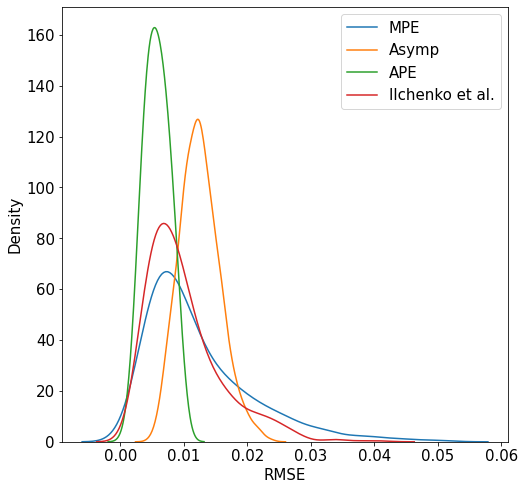

In [7]:
import numpy as np
import seaborn as sns
plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
sns.kdeplot(data.MPE_RMSE, bw=0.3,label='MPE')
sns.kdeplot(data.Asym_RMSE, bw=0.25,label='Asymp')
sns.kdeplot(data.APE_RMSE, bw=0.55,label='APE')
sns.kdeplot(data.il_rmse, bw=0.3,label='Ilchenko et al.')
plt.xlabel('RMSE')
plt.legend()

plt.savefig("rmse_utmb.jpeg",dpi=900,bbox_inches='tight')

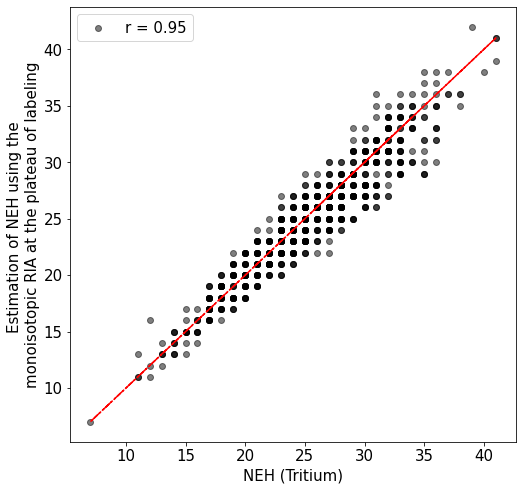

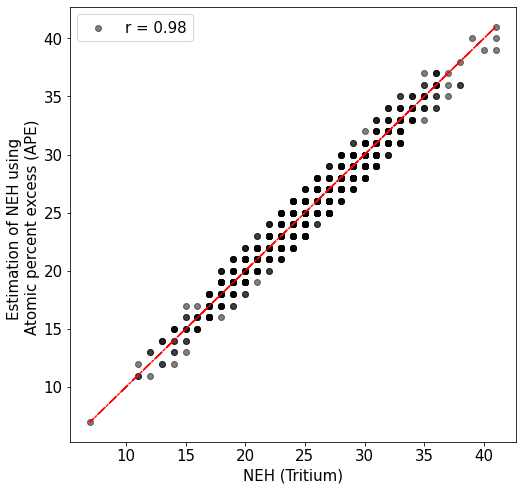

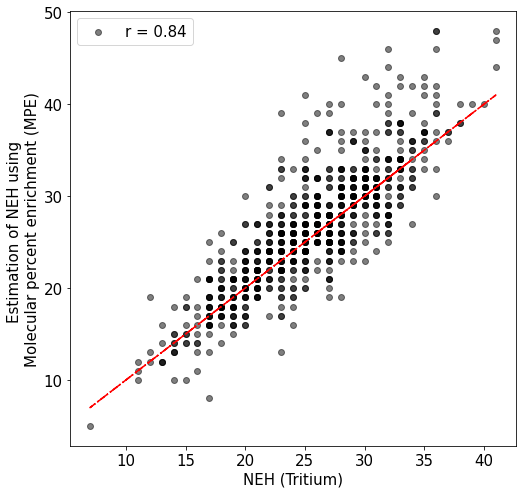

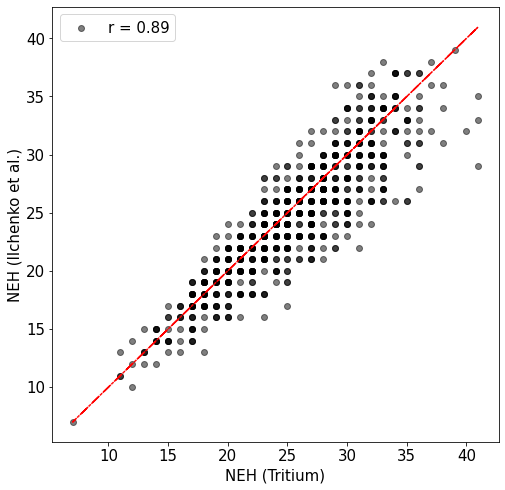

In [8]:
plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.Asym_NEH,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.Asym_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("Estimation of NEH using the \nmonoisotopic RIA at the plateau of labeling")
plt.legend()
plt.savefig("asym_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.APE_NEH,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.APE_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("Estimation of NEH using  \nAtomic percent excess (APE) ")
plt.legend()
plt.savefig("ape_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.MPE_NEH,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.MPE_NEH)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("Estimation of NEH using \nMolecular percent enrichment (MPE)")
plt.legend()
plt.savefig("mpe_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

# plt.rc('font', size=15) 
# plt.figure(figsize=(8,8))
# plt.scatter(data.T_NEH,data.sd_neh,alpha=0.5,label='sd',c='k')
# plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
# plt.xlabel("NEH (Tritium)")
# plt.ylabel("Estimation of NEH using the \nmonoisotopic RIA at the plateau of labeling")
# plt.legend()
# plt.show()

plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data.T_NEH,data.il_neh,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data.T_NEH,data.il_neh)[0][1]),c='k')
plt.plot(data.T_NEH,data.T_NEH,ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("NEH (Ilchenko et al.)")
plt.legend()
plt.savefig("lich_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()

In [9]:
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\neh_from_formula_utmb.csv")
data.columns

Index(['data.Peptide', 'data.Protein', 'data.Charge', 'data.T_NEH', 'pxt',
       'neh'],
      dtype='object')

In [10]:
# plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,label='il_neh',c='k')
# plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
# plt.legend()
# plt.show()

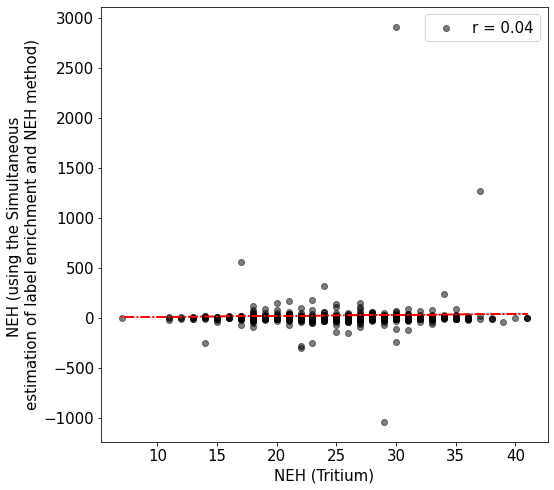

In [11]:
plt.rc('font', size=15) 
plt.figure(figsize=(8,8))
plt.scatter(data['data.T_NEH'],data.neh,alpha=0.5,
            label='r = '+'{0:.2f}'.format(np.corrcoef(data['data.T_NEH'],data.neh)[0][1]),c='k')
plt.plot(data['data.T_NEH'],data['data.T_NEH'],ls="-.",c='r')
plt.xlabel("NEH (Tritium)")
plt.ylabel("NEH (using the Simultaneous \nestimation of label enrichment and NEH method)")
plt.legend()
plt.savefig("simul_utmb.jpeg",dpi=900,bbox_inches='tight')
plt.show()